In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
data = Path("data/earthquakes.csv")

> Side note: Researching this week’s question, I was reminded that the measurement scale is logarithmic, meaning that a magnitude-6 earthquake is 10 times larger than a magnitude 5 earthquake. I didn’t realize, however, that the damage done isn’t 10 times greater — it can be more than 30 times greater. Yikes. And I also learned that we no longer use the Richter scale, even though people commonly refer to it that way. And that the scale describes the logarithm of the amplitude of the earthquake’s waves, as measured on a seismograph.

## 1. Read the downloaded CSV file (which will be called `query.csv`, but which I renamed to `earthquake-data.csv` on my computer) into Pandas.

In [4]:
df = pd.read_csv(data, parse_dates=["time", "updated"], index_col="time")

In [11]:
sorted(df.columns)

['depth',
 'depthError',
 'dmin',
 'gap',
 'horizontalError',
 'id',
 'latitude',
 'locationSource',
 'longitude',
 'mag',
 'magError',
 'magNst',
 'magSource',
 'magType',
 'net',
 'nst',
 'place',
 'rms',
 'status',
 'type',
 'updated']

In [13]:
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2023-02-14 13:16:50.827000+00:00,45.099800,23.201300,10.000,5.60,mww,197.0,27.0,1.217,0.60,us,us6000jnqz,2023-07-28 14:12:02.324000+00:00,"0 km ESE of Lele?ti, Romania",earthquake,5.14,1.742,0.0320,95.0,reviewed,us,us
2023-02-14 02:03:16.305000+00:00,-15.355200,167.541000,119.646,5.20,mww,130.0,20.0,0.338,0.80,us,us6000jnpc,2023-04-22 21:33:07.040000+00:00,"44 km ENE of Luganville, Vanuatu",earthquake,7.67,3.289,0.0890,12.0,reviewed,us,us
2023-02-13 09:18:12.524000+00:00,-29.369800,-178.971800,354.000,6.10,mww,120.0,34.0,0.919,1.07,us,us6000jnk5,2023-04-22 21:33:05.040000+00:00,"Kermadec Islands, New Zealand",earthquake,9.97,1.679,0.0490,40.0,reviewed,us,us
2023-02-12 02:21:23.340000+00:00,19.149833,-155.370833,30.210,3.83,ml,49.0,180.0,NaN,0.15,hv,hv73323102,2023-04-22 21:33:01.040000+00:00,"12 km ESE of P?hala, Hawaii",earthquake,0.54,0.710,0.1112,39.0,reviewed,hv,hv
2023-02-11 15:31:26.636000+00:00,-35.361600,-15.569700,10.000,5.60,mww,43.0,85.0,21.229,0.63,us,us6000jnb3,2023-04-15 21:39:58.040000+00:00,Tristan da Cunha region,earthquake,12.93,1.881,0.0730,18.0,reviewed,us,us


In [90]:
df.type.value_counts()

earthquake           8043
volcanic eruption      17
nuclear explosion       1
Name: type, dtype: int64

## 2. How many seismic events take place each year? In which of the last 20 years did we have the greatest number of such events?

In [16]:
df.groupby(df.index.year).size().sort_values(ascending=False)

time
2021    1029
2020     932
2019     848
2018     833
2022     778
2014     760
2015     695
2016     680
2013     611
2017     595
2023      95
2010      57
2012      20
2008      19
2009      18
2005      17
2001      15
2011      13
2003      11
2002      11
2004       8
2000       8
2006       5
2007       3
dtype: int64

In [62]:
# alternative
df.index.year.value_counts()

2021    1029
2020     932
2019     848
2018     833
2022     778
2014     760
2015     695
2016     680
2013     611
2017     595
2023      95
2010      57
2012      20
2008      19
2009      18
2005      17
2001      15
2011      13
2003      11
2002      11
2004       8
2000       8
2006       5
2007       3
Name: time, dtype: int64

## 3. What are common magnitudes? Looking only at the integer portion of the magnitudes, how often does each value occur?

In [75]:
df["magClass"] = df.mag.astype("int8")

In [76]:
df.magClass.value_counts()

5    4575
4    1593
6    1255
3     482
7     135
8      12
2       9
Name: magClass, dtype: int64

### What percentage of earthquakes in our data set were 7 or greater? We can find out by passing “normalize=True” to “value_counts”:

In [77]:
df.magClass.value_counts(normalize=True)

5    0.567547
4    0.197618
6    0.155688
3    0.059794
7    0.016747
8    0.001489
2    0.001116
Name: magClass, dtype: float64

<AxesSubplot: >

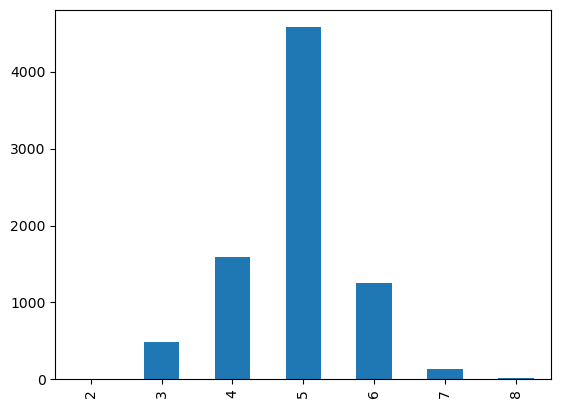

In [29]:
df.magClass.value_counts().sort_index().plot(kind="bar")

## 4. How many seismic events took place in Turkey on February 6th? What was their average magnitude? What was the mean magnitude?

In [78]:
df_sub = df.dropna(subset='place')
df_sub = df_sub.loc["2023-02-06"]
df_sub = df_sub[df_sub.place.str.contains("Turkey")]

In [79]:
df_sub.size

220

In [80]:
df_sub.mag.describe()

count    10.000000
mean      5.710000
std       0.481779
min       4.900000
25%       5.450000
50%       5.700000
75%       5.950000
max       6.700000
Name: mag, dtype: float64

## 5. Are earthquakes common in Turkey? From the "place" column, extract the text following the final comma, and get the 30 most common places in the world with earthquakes.

In [81]:
df["region"] = df.place.str.split(",").str.get(-1).str.strip()

In [86]:
df.region.value_counts().head(30)

Alaska                              913
Indonesia                           521
CA                                  398
Papua New Guinea                    367
Chile                               273
Japan                               270
Tonga                               222
South Sandwich Islands region       202
Philippines                         197
New Zealand                         183
Solomon Islands                     183
Vanuatu                             183
Oklahoma                            175
Hawaii                              170
Kermadec Islands region             147
Russia                              137
Mexico                              135
California                          130
Puerto Rico                         129
MX                                  106
Nevada                              102
Peru                                 90
Pacific-Antarctic Ridge              81
Fiji                                 78
Idaho                                74


<AxesSubplot: >

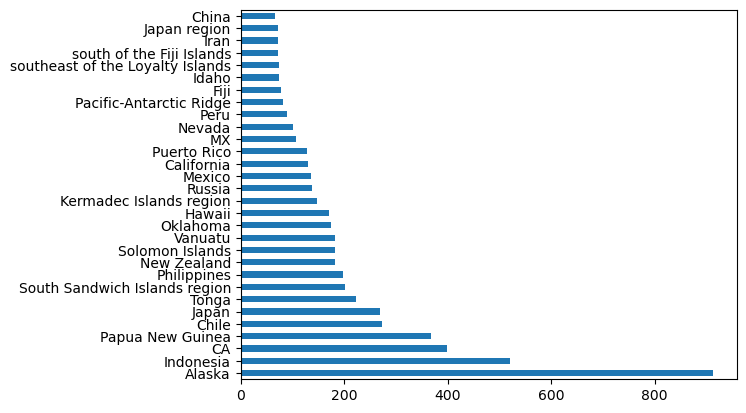

In [87]:
df.region.value_counts().head(30).plot(kind="barh")

## 6. Are serious earthquakes common in Turkey? Rerun the previous query, but only look for those with a magnitude of 5 or greater.

In [88]:
df[df.magClass >= 5].region.value_counts().head(30)

Indonesia                           516
Papua New Guinea                    366
Chile                               270
Japan                               267
Alaska                              265
Tonga                               221
South Sandwich Islands region       202
Philippines                         197
Solomon Islands                     183
Vanuatu                             182
New Zealand                         169
Kermadec Islands region             146
Russia                              134
Mexico                              132
Peru                                 89
Pacific-Antarctic Ridge              81
Fiji                                 76
southeast of the Loyalty Islands     74
south of the Fiji Islands            73
Japan region                         72
Iran                                 71
China                                66
New Caledonia                        60
southern East Pacific Rise           60
Greece                               56


<AxesSubplot: >

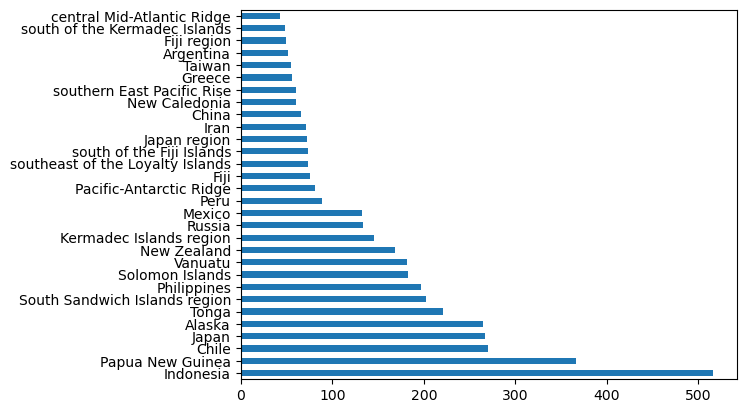

In [89]:
df[df.magClass >= 5].region.value_counts().head(30).plot(kind="barh")

## Bonus: Volcanic eruptions

In [99]:
df[df.type == "volcanic eruption"].region.value_counts()

Hawaii    17
Name: region, dtype: int64

In [100]:
df[df.type == "volcanic eruption"].index

DatetimeIndex(['2018-07-24 16:41:10.140000+00:00',
               '2018-07-23 06:53:38.820000+00:00',
               '2018-07-21 19:43:28.660000+00:00',
               '2018-07-20 02:33:01.690000+00:00',
               '2018-07-18 11:28:04.040000+00:00',
               '2018-07-16 21:42:35.500000+00:00',
               '2018-07-03 12:17:03.810000+00:00',
               '2018-06-29 17:50:46.270000+00:00',
               '2018-06-14 13:19:37.120000+00:00',
               '2018-06-13 13:39:37.610000+00:00',
               '2018-06-05 14:32:34.450000+00:00',
               '2018-06-01 23:37:15.150000+00:00',
               '2018-05-29 11:56:11.570000+00:00',
               '2018-05-26 10:44:37.620000+00:00',
               '2018-05-22 03:51:11.860000+00:00',
               '2018-05-20 21:50:07.310000+00:00',
               '2018-05-17 04:15:30.350000+00:00'],
              dtype='datetime64[ns, UTC]', name='time', freq=None)

## Bonus: Depth analysis

In [101]:
df.depth.describe()

count    8061.000000
mean       49.247573
std       107.406031
min        -1.920000
25%        10.000000
50%        11.400000
75%        35.000000
max       670.810000
Name: depth, dtype: float64

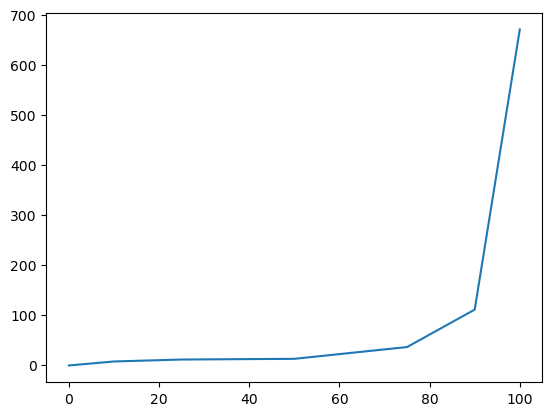

In [15]:
percentiles = [0, 10, 25, 50, 75, 90, 100]
plt.plot(percentiles, np.percentile(df.depth, percentiles))